# Statistical Inference on PM2.5 Concentrations in China from 2013 to 2015

## Group 46

### Tsun Li Nicholas Tam, Camila Dall Bello, Leon Zhang

## Introduction
### Background Information
From 2010 to 2013, substantial parts of China have suffered from chronic air pollution. The main pollutants are PM2.5, otherwise known as particulate matter, referring to tiny particles in the air with aerodynamic diameters of 2.5 micrometers (2.5 * 10^(-6) m or 2.5 μm) or less. PM2.5 consists of a complex mixture of solids and aerosols, with particles containing various organic and inorganic compounds. (Inhalable Particulate Matter and Health (PM2.5 and PM10)) 

The presence of high concentrations of PM2.5 in China has negatively influenced the climate, visibility, and human health, with the most notable case being the Eastern China smog outbreak in December 2013, where PM2.5 levels reached as high as 507 micrograms per cubic metre (507 * 10^(-6) g/m^3). (Con Gen ShanghaiAir, 2013) In 2013, in an attempt to reduce air pollution, the Chinese government issued a National Air Quality Action Plan, aiming to significantly reduce the concentrations of PM2.5 in China by 2017. (Andrews-Speed, P., Shobert., B. A., Zhidong, L., &amp; Herberg, M. E., 2015)

### Dataset and Project Question
For our research project, we have selected datasets of hourly observations of PM2.5 concentration from 1-1-2013 to 12-31-2015. These datasets were retrieved from the [PM2.5 Data of Five Chinese Cities Data Set](https://archive.ics.uci.edu/ml/datasets/PM2.5+Data+of+Five+Chinese+Cities) from UCI machine learning repository, and converted from a singular RAR file to CSV files online. The datasets contain PM2.5 data in Beijing, Shanghai, Guangzhou, Chengdu and Shenyang, along with other meteorological data for each city, from 2013 to 2015.

Our project question is: "Given the sample data for cities in China, is there a significant decrease in PM2.5 concentration in the cities in China between 2013 and 2015?" 

Given the project question, let $\mu_1$ be the PM2.5 concentration in 2013 measured in μg/m^3, and let $\mu_2$ be the PM2.5 concentration in 2015 measured in μg/m^3, with the following hypotheses: 

$$H_0: \mu_{1} = \mu_{2}$$ 
$$H_1: \mu_{1} > \mu_{2}$$

<!-- Generalisations based on sample -->
<!-- Differences in locations -->

<!-- $\bar{X}_1 - \bar{X}_2$ -->

## Preliminary Results

### Loading relevant libraries

In [1]:
# Imports

# install.packages("infer") # Install infer package for use

library(dplyr) # Data manipulation operations
library(gridExtra) # Extensions for grid system
library(tidyverse) # Better presentation of data
library(repr) # String and binary representations of objects for several formats / mime types 
library(digest) 
library(lubridate) # Easier date organisation
library(infer) # Bootstrap distribution, confidence interval
# library(cowplot) # Add-on to gg-plot


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine


Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0     ✔ purrr   1.0.0
✔ tibble  3.1.8     ✔ stringr 1.5.0
✔ tidyr   1.2.1     ✔ forcats 0.5.2
✔ readr   2.1.3     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ gridExtra::combine() masks dplyr::combine()
✖ dplyr::filter()      masks stats::filter()
✖ dplyr::lag()         masks stats::lag()
Loading required package: timechange


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




### Uploading and merging relevant tables

- Since there were multiple datasets to be used, it is decided to read each data set separately, then merge them into a single dataframe called `total_PM2.5_AV`. 
- Before merging, two new columns are created:
    - `location`, to indicate the differing cities in China 
    - `date`, to indicate the date for each recorded value, using the `year`, `month` and `day` columns from the initial datasets
- Each of the original datasets contains values for PM2.5 concentrations in 3 separate locations per hour. For the sake of simplicity, the values have been averaged together into a single column, `PM_2.5_AV`, for each location.

In [ ]:
# Preparing URLs
beijing_PM2.5 <- read.csv("https://raw.githubusercontent.com/Nick-2003/STAT-201-Group-46-Project/main/Data%20Sets/BeijingPM20100101_20151231.csv")
# beijing_PM2.5 <- read.csv("https://github.com/Nick-2003/STAT-201-Group-46-Project/raw/main/Data%20Sets/BeijingPM20100101_20151231.csv")
shanghai_PM2.5 <- read.csv("https://raw.githubusercontent.com/Nick-2003/STAT-201-Group-46-Project/main/Data%20Sets/ShanghaiPM20100101_20151231.csv")
chengdu_PM2.5 <- read.csv("https://raw.githubusercontent.com/Nick-2003/STAT-201-Group-46-Project/main/Data%20Sets/ChengduPM20100101_20151231.csv")
guangzhou_PM2.5 <- read.csv("https://raw.githubusercontent.com/Nick-2003/STAT-201-Group-46-Project/main/Data%20Sets/GuangzhouPM20100101_20151231.csv")
shenyang_PM2.5 <- read.csv("https://raw.githubusercontent.com/Nick-2003/STAT-201-Group-46-Project/main/Data%20Sets/ShenyangPM20100101_20151231.csv")

# Preparing datasets
# beijing_PM2.5 <- na.omit(beijing_PM2.5) # Need to change to apply only for columns without PM2.5 data
beijing_PM2.5_AV <- beijing_PM2.5 %>% 
    filter(!is.na(PM_Dongsi), !is.na(PM_Dongsihuan), !is.na(PM_Nongzhanguan)) %>% 
    mutate(PM_2.5_AV = (PM_Dongsi + PM_Dongsihuan + PM_Nongzhanguan)/3) %>% 
    mutate(location = "Beijing") %>% 
    select(location, year, PM_2.5_AV) 
    # mutate(date = make_date(year = year, month = month, day = day)) %>% 
    # group_by(location, date) %>% 
    # summarise(PM_2.5_AV = mean(PM_2.5_AV, na.rm = TRUE)) %>% # PM_2.5_AV becomes mean for each day
    # select(location, date, PM_2.5_AV)
# head(beijing_PM2.5_AV)

# shanghai_PM2.5 <- na.omit(shanghai_PM2.5)
shanghai_PM2.5_AV <- shanghai_PM2.5 %>% 
    filter(!is.na(PM_Jingan), !is.na(PM_US.Post), !is.na(PM_Xuhui)) %>% 
    mutate(PM_2.5_AV = (PM_Jingan + PM_US.Post + PM_Xuhui)/3) %>% 
    mutate(location = "Shanghai") %>% 
    select(location, year, PM_2.5_AV)
    # mutate(date = make_date(year = year, month = month, day = day)) %>% 
    # group_by(location, date) %>% 
    # summarise(PM_2.5_AV = mean(PM_2.5_AV, na.rm = TRUE)) %>% 
    # select(location, date, PM_2.5_AV)
# head(shanghai_PM2.5_AV)

# chengdu_PM2.5 <- na.omit(chengdu_PM2.5)
chengdu_PM2.5_AV <- chengdu_PM2.5 %>% 
    filter(!is.na(PM_Caotangsi), !is.na(PM_Shahepu), !is.na(PM_US.Post)) %>% 
    mutate(PM_2.5_AV = (PM_Caotangsi + PM_Shahepu + PM_US.Post)/3) %>% 
    mutate(location = "Chengdu") %>% 
    select(location, year, PM_2.5_AV)
    # mutate(date = make_date(year = year, month = month, day = day)) %>% 
    # group_by(location, date) %>% 
    # summarise(PM_2.5_AV = mean(PM_2.5_AV, na.rm = TRUE)) %>% 
    # select(location, date, PM_2.5_AV)
# head(chengdu_PM2.5_AV)

# guangzhou_PM2.5 <- na.omit(guangzhou_PM2.5)
guangzhou_PM2.5_AV <- guangzhou_PM2.5 %>% 
    filter(!is.na(PM_City.Station), !is.na(PM_5th.Middle.School), !is.na(PM_US.Post)) %>% 
    mutate(PM_2.5_AV = (PM_City.Station + PM_5th.Middle.School + PM_US.Post)/3) %>% 
    mutate(location = "Guangzhou") %>% 
    select(location, year, PM_2.5_AV)
    # mutate(date = make_date(year = year, month = month, day = day)) %>% 
    # group_by(location, date) %>% 
    # summarise(PM_2.5_AV = mean(PM_2.5_AV, na.rm = TRUE)) %>% 
    # select(location, date, PM_2.5_AV)
# head(guangzhou_PM2.5_AV)

# shenyang_PM2.5 <- na.omit(shenyang_PM2.5)
shenyang_PM2.5_AV <- shenyang_PM2.5 %>% 
    filter(!is.na(PM_Taiyuanjie), !is.na(PM_US.Post), !is.na(PM_Xiaoheyan)) %>% 
    mutate(PM_2.5_AV = (PM_Taiyuanjie + PM_US.Post + PM_Xiaoheyan)/3) %>% 
    mutate(location = "Shenyang") %>% 
    select(location, year, PM_2.5_AV)
    # mutate(date = make_date(year = year, month = month, day = day)) %>% 
    # group_by(location, date) %>% 
    # summarise(PM_2.5_AV = mean(PM_2.5_AV, na.rm = TRUE)) %>% 
    # select(location, date, PM_2.5_AV)
# head(shenyang_PM2.5_AV)

# Merging datasets
total_PM2.5_AV <- rbind(beijing_PM2.5_AV, shanghai_PM2.5_AV, chengdu_PM2.5_AV, guangzhou_PM2.5_AV, shenyang_PM2.5_AV) 

# total_PM2.5_AV <- total_PM2.5_AV %>% 
    # group_by(location, year, month, day) %>% 
    # summarise(PM_2.5_AVG = mean(PM_2.5_AV, na.rm = TRUE)) %>% 
#     select(location, year, month, day, PM_2.5_AVG)

head(total_PM2.5_AV)

,location,year,PM_2.5_AV
,<chr>,<int>,<dbl>
1,Beijing,2013,141.0000
2,Beijing,2013,149.3333
3,Beijing,2013,147.3333
4,Beijing,2013,118.0000
5,Beijing,2013,113.6667
6,Beijing,2013,173.3333


In [26]:
countChinaDates <- total_PM2.5_AV %>% 
    # mutate(year = year(date)) %>%
    group_by(location, year) %>%
    tally() 
countChinaDates

location,year,n
<chr>,<int>,<int>
Beijing,2013,6367
Beijing,2014,8011
Beijing,2015,5235
Chengdu,2013,6032
Chengdu,2014,8029
Chengdu,2015,8229
Guangzhou,2013,3863
Guangzhou,2014,7884
Guangzhou,2015,8327


## Box plots 

Warning message:
“Removed 16 rows containing non-finite values (`stat_boxplot()`).”


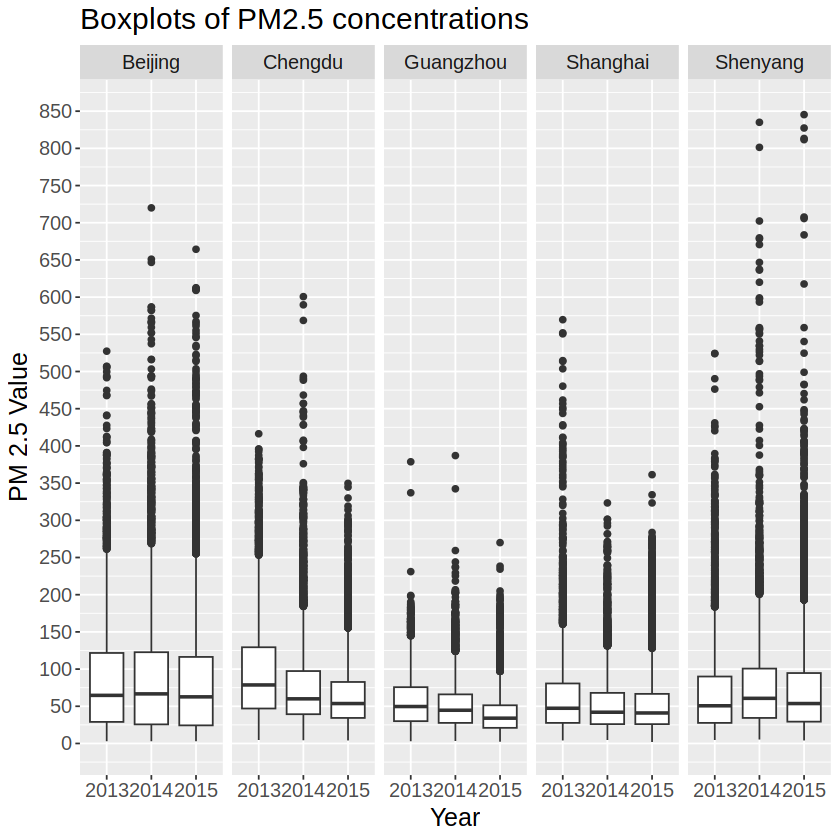

In [28]:
# scatter_beijing <- total_PM2.5_AV %>% 
#     filter(location == "Beijing") %>% 
#     ggplot(aes(x = date, y = PM_2.5_AV)) + 
#     # geom_point(aes(colour = location)) + 
#     geom_line() + 
#     labs(x = "Date", y = "PM 2.5 Value", colour = "Location") + 
#     theme(text = element_text(size = 20)) 
# scatter_beijing

box_total <- total_PM2.5_AV %>% 
    # mutate(year = as.character(year(date))) %>%
    mutate(year = as.character(year)) %>%
    ggplot(aes(x = year, y = PM_2.5_AV)) + 
    geom_boxplot() + 
    labs(x = "Year", y = "PM 2.5 Value") + 
    facet_wrap(~location, scales="fixed", nrow = 1) +
    ggtitle("Boxplots of PM2.5 concentrations") + 
    theme(text = element_text(size = 15)) +
    scale_y_continuous(limits = c(0, 850), breaks = seq(0, 850, by = 50))
box_total

Warning message:
“Removed 768 rows containing non-finite values (`stat_bin()`).”
Warning message:
“Removed 10 rows containing missing values (`geom_bar()`).”
Warning message:
“Removed 599 rows containing non-finite values (`stat_bin()`).”
Warning message:
“Removed 11 rows containing missing values (`geom_bar()`).”


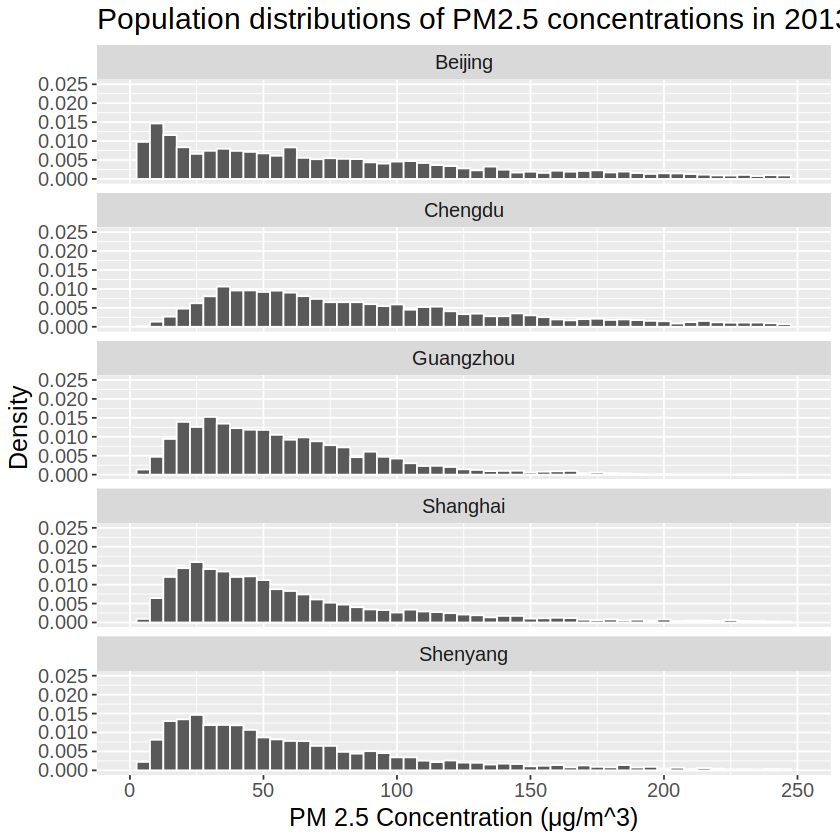

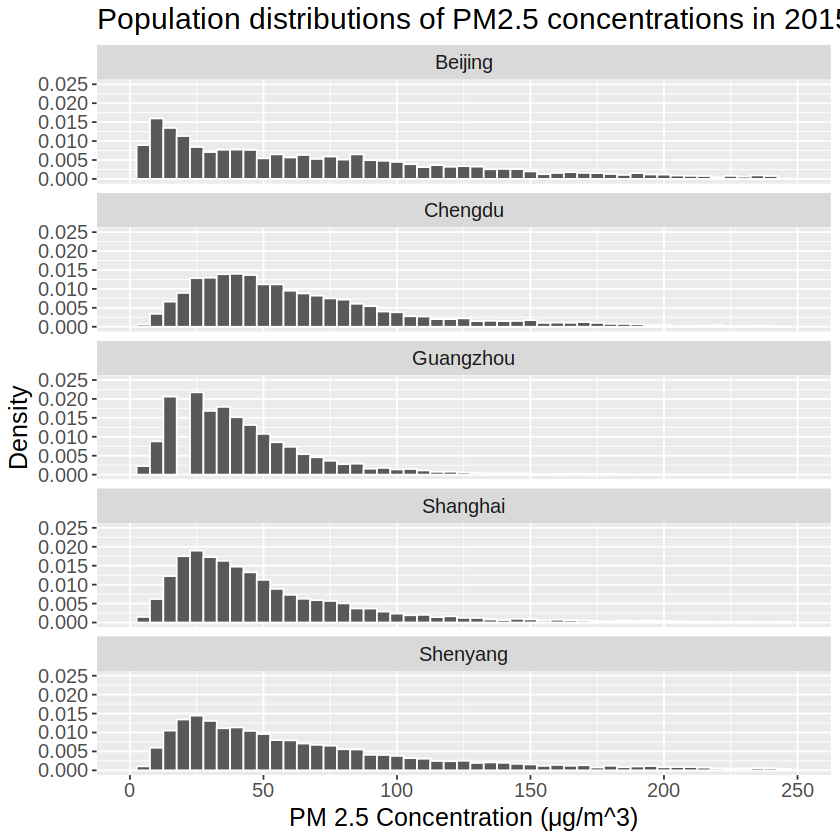

In [40]:
dist_total_2013 <- total_PM2.5_AV %>% 
    # mutate(year = as.character(year(date))) %>%
    # mutate(year = as.character(year)) %>%
    # filter(year == "2013") %>% 
    filter(year == 2013) %>% 
    ggplot() + 
    geom_histogram(aes(x = PM_2.5_AV, y = ..density..), color = 'white', binwidth = 5) +
    labs(x = "PM 2.5 Concentration (μg/m^3)", y = "Density") + 
    facet_wrap(~location, scales="fixed", nrow = 5) +
    ggtitle("Population distributions of PM2.5 concentrations in 2013 by Location") + 
    theme(text = element_text(size = 15)) +
    scale_x_continuous(limits = c(0, 250), breaks = seq(0, 250, by = 50)) + 
    scale_y_continuous(limits = c(0, 0.025), breaks = seq(0, 0.025, by = 0.005))
dist_total_2013

dist_total_2015 <- total_PM2.5_AV %>% 
    # mutate(year = as.character(year(date))) %>%
    # mutate(year = as.character(year)) %>%
    # filter(year == "2015") %>% 
    filter(year == 2015) %>% 
    ggplot() + 
    geom_histogram(aes(x = PM_2.5_AV, y = ..density..), color = 'white', binwidth = 5) +
    labs(x = "PM 2.5 Concentration (μg/m^3)", y = "Density") + 
    facet_wrap(~location, scales="fixed", nrow = 5) +
    ggtitle("Population distributions of PM2.5 concentrations in 2015 by Location") + 
    theme(text = element_text(size = 15)) +
    scale_x_continuous(limits = c(0, 250), breaks = seq(0, 250, by = 50)) + 
    scale_y_continuous(limits = c(0, 0.025), breaks = seq(0, 0.025, by = 0.005))
dist_total_2015

## Methods: Plan

This report will 

## References

<!-- - Liang, X., S. Li, S. Zhang, H. Huang, and S. X. Chen (2016), PM2.5 data reliability, consistency, and air quality assessment in five Chinese cities, J. Geophys. Res. Atmos., 121, 10220â€“10236 doi:10.1002/2016JD024877 -->
- Liang, X. (2016). PM 2.5 data reliability, consistency, and air quality assessment in five chinese cities CONSISTENCY IN CHINA'S PM 2.5 DATA doi:10.1002/2016JD024877
- “California Air Resources Board.” Inhalable Particulate Matter and Health (PM2.5 and PM10) | California Air Resources Board, https://ww2.arb.ca.gov/resources/inhalable-particulate-matter-and-health#:~:text=For%20PM2.,symptoms%2C%20and%20restricted%20activity%20days.
- Andrews-Speed, P., Shobert., B. A., Zhidong, L., &amp; Herberg, M. E. (2015). China's energy crossroads: Forging a new energy and environmental balance. Project Muse. 